In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tanzania-tourism/SampleSubmission.csv
/kaggle/input/tanzania-tourism/Train.csv
/kaggle/input/tanzania-tourism/VariableDefinitions.csv
/kaggle/input/tanzania-tourism/Test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [3]:
sample = pd.read_csv("../input/tanzania-tourism/SampleSubmission.csv")
train = pd.read_csv("../input/tanzania-tourism/Train.csv")
var = pd.read_csv("../input/tanzania-tourism/VariableDefinitions.csv")
test = pd.read_csv("../input/tanzania-tourism/Test.csv")

In [4]:
pd.set_option("max_columns", 200)
train.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [5]:
pd.set_option("max_columns", 100)
test.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [6]:
var

,Column Name,Definition
0,id,Unique identifier for each tourist
1,country,The country a tourist coming from.
2,age_group,The age group of a tourist.
3,travel_with,The relation of people a tourist travel with t...
4,total_female,Total number of females
5,total_male,Total number of males
6,purpose,The purpose of visiting Tanzania
7,main_activity,The main activity of tourism in Tanzania
8,infor_source,The source of information about tourism in Tan...
9,tour_arrangment,The arrangment of visiting Tanzania


In [7]:
sample.head()

,ID,total_cost
0,tour_1,0
1,tour_100,0
2,tour_1001,0
3,tour_1006,0
4,tour_1009,0


# Data Wrangling

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4809 non-null   object 
 1   country                4809 non-null   object 
 2   age_group              4809 non-null   object 
 3   travel_with            3695 non-null   object 
 4   total_female           4806 non-null   float64
 5   total_male             4804 non-null   float64
 6   purpose                4809 non-null   object 
 7   main_activity          4809 non-null   object 
 8   info_source            4809 non-null   object 
 9   tour_arrangement       4809 non-null   object 
 10  package_transport_int  4809 non-null   object 
 11  package_accomodation   4809 non-null   object 
 12  package_food           4809 non-null   object 
 13  package_transport_tz   4809 non-null   object 
 14  package_sightseeing    4809 non-null   object 
 15  pack

In [9]:
train.isnull().sum()

ID                          0
country                     0
age_group                   0
travel_with              1114
total_female                3
total_male                  5
purpose                     0
main_activity               0
info_source                 0
tour_arrangement            0
package_transport_int       0
package_accomodation        0
package_food                0
package_transport_tz        0
package_sightseeing         0
package_guided_tour         0
package_insurance           0
night_mainland              0
night_zanzibar              0
payment_mode                0
first_trip_tz               0
most_impressing           313
total_cost                  0
dtype: int64

In [10]:
train.tail()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
4804,tour_993,UAE,45-64,Alone,0.0,1.0,Business,Hunting tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,2.0,0.0,Credit Card,No,No comments,3315000.0
4805,tour_994,UNITED STATES OF AMERICA,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,11.0,0.0,Cash,Yes,Friendly People,10690875.0
4806,tour_995,NETHERLANDS,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,others,Independent,No,No,No,No,No,No,No,3.0,7.0,Cash,Yes,Good service,2246636.7
4807,tour_997,SOUTH AFRICA,25-44,Friends/Relatives,1.0,1.0,Business,Beach tourism,"Travel, agent, tour operator",Independent,Yes,Yes,Yes,No,No,No,No,5.0,0.0,Credit Card,No,Friendly People,1160250.0
4808,tour_999,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,No,4.0,7.0,Cash,Yes,Friendly People,13260000.0


In [11]:
train.travel_with.value_counts()

Alone                  1265
Spouse                 1005
Friends/Relatives       895
Spouse and Children     368
Children                162
Name: travel_with, dtype: int64

In [12]:
train.travel_with = train.travel_with.fillna("Alone")
train.travel_with.isnull().any()

False

In [13]:
train.total_female.value_counts()

1.0     2418
0.0     1669
2.0      463
3.0      144
4.0       46
5.0       25
6.0       15
7.0       10
10.0       4
9.0        4
12.0       3
11.0       3
15.0       1
49.0       1
Name: total_female, dtype: int64

In [14]:
train.total_female = train.total_female.fillna(1.0)
train.total_female.isnull().any()

False

In [15]:
train.total_male.value_counts()

1.0     2961
0.0     1137
2.0      478
3.0      139
4.0       46
6.0       17
5.0       15
15.0       2
7.0        2
10.0       2
9.0        2
17.0       1
12.0       1
44.0       1
Name: total_male, dtype: int64

In [16]:
train.total_male = train.total_male.fillna(1.0)
train.total_male.isna().any()

False

In [17]:
train.most_impressing.value_counts()

Friendly People                         1541
 Wildlife                               1038
No comments                              743
Wonderful Country, Landscape, Nature     507
Good service                             365
Excellent Experience                     271
Satisfies and Hope Come Back              31
Name: most_impressing, dtype: int64

In [18]:
train.most_impressing = train.most_impressing.fillna("No comments")
train.most_impressing.isnull().any()

False

In [19]:
train.rename(columns={"total_female":"female","total_male":"male", "most_impressing":"feedback"}, inplace = True)
train.head()

,ID,country,age_group,travel_with,female,male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,feedback,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [20]:
num_cols = ["age_group", "male", "female", "night_mainland", "night_zanzibar"]
train[num_cols + ["total_cost"]].describe()

,male,female,night_mainland,night_zanzibar,total_cost
count,4809.000000,4809.000000,4809.000000,4809.000000,4.809000e+03
mean,1.009565,0.926804,8.488043,2.304429,8.114389e+06
std,1.138273,1.287841,10.427624,4.227080,1.222490e+07
min,0.000000,0.000000,0.000000,0.000000,4.900000e+04
25%,1.000000,0.000000,3.000000,0.000000,8.121750e+05
50%,1.000000,1.000000,6.000000,0.000000,3.397875e+06
75%,1.000000,1.000000,11.000000,4.000000,9.945000e+06
max,44.000000,49.000000,145.000000,61.000000,9.953288e+07


In [21]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601 entries, 0 to 1600
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     1601 non-null   object 
 1   country                1601 non-null   object 
 2   age_group              1601 non-null   object 
 3   travel_with            1274 non-null   object 
 4   total_female           1600 non-null   float64
 5   total_male             1599 non-null   float64
 6   purpose                1601 non-null   object 
 7   main_activity          1601 non-null   object 
 8   info_source            1601 non-null   object 
 9   tour_arrangement       1601 non-null   object 
 10  package_transport_int  1601 non-null   object 
 11  package_accomodation   1601 non-null   object 
 12  package_food           1601 non-null   object 
 13  package_transport_tz   1601 non-null   object 
 14  package_sightseeing    1601 non-null   object 
 15  pack

In [22]:
test.isnull().sum()

ID                         0
country                    0
age_group                  0
travel_with              327
total_female               1
total_male                 2
purpose                    0
main_activity              0
info_source                0
tour_arrangement           0
package_transport_int      0
package_accomodation       0
package_food               0
package_transport_tz       0
package_sightseeing        0
package_guided_tour        0
package_insurance          0
night_mainland             0
night_zanzibar             0
payment_mode               0
first_trip_tz              0
most_impressing          111
dtype: int64

In [23]:
test.travel_with.value_counts()

Alone                  403
Spouse                 369
Friends/Relatives      327
Spouse and Children    120
Children                55
Name: travel_with, dtype: int64

In [24]:
test.travel_with = test.travel_with.fillna("Alone")
test.travel_with.isnull().any()

False

In [25]:
test.total_female.value_counts()

1.0     800
0.0     552
2.0     168
3.0      49
4.0      14
5.0       4
7.0       3
6.0       3
10.0      2
11.0      2
9.0       1
20.0      1
12.0      1
Name: total_female, dtype: int64

In [26]:
test.total_female = test.total_female.fillna(1.0)
test.total_female.isna().value_counts()

False    1601
Name: total_female, dtype: int64

In [27]:
test.total_male.value_counts()

1.0     1006
0.0      337
2.0      180
3.0       44
4.0       18
5.0        6
7.0        4
6.0        2
10.0       1
40.0       1
Name: total_male, dtype: int64

In [28]:
test.total_male = test.total_male.fillna(1.0)
test.total_male.isna().value_counts()

False    1601
Name: total_male, dtype: int64

In [29]:
test.most_impressing.value_counts()

Friendly People                         517
 Wildlife                               349
No comments                             267
Wonderful Country, Landscape, Nature    168
Good service                            102
Excellent Experience                     79
Satisfies and Hope Come Back              8
Name: most_impressing, dtype: int64

In [30]:
test.most_impressing = test.most_impressing.fillna("No comments")
test.most_impressing.isnull().value_counts()

False    1601
Name: most_impressing, dtype: int64

In [31]:
test.rename(columns={"total_female":"female","total_male":"male", "most_impressing":"feedback"}, inplace = True)
test.head()

,ID,country,age_group,travel_with,female,male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,feedback
0,tour_1,AUSTRALIA,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


In [32]:
test[num_cols].describe()

,male,female,night_mainland,night_zanzibar
count,1601.000000,1601.000000,1601.000000,1601.000000
mean,1.056839,0.925671,8.741412,2.495315
std,1.309062,1.169443,19.788490,6.266489
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,5.000000,0.000000
75%,1.000000,1.000000,10.000000,4.000000
max,40.000000,20.000000,664.000000,174.000000


# Feature Engineering
* Country ISO Code
* Continent

In [33]:
train.columns

Index(['ID', 'country', 'age_group', 'travel_with', 'female', 'male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'feedback', 'total_cost'],
      dtype='object')

In [34]:
train.country = train.country.replace("SWIZERLAND", "SWITZERLAND")

!pip install country-converter
import country_converter as coco

cc = coco.CountryConverter()
iso3 = np.array([])
for i in range(0, len(train)):
    iso3= np.append(iso3, cc.convert(names=train['country'][i], to='ISO3' ))
train['ISO3'] = pd.DataFrame(iso3) 
train.columns
train = train[['ID', 'country', 'ISO3','age_group', 'travel_with', 'female', 'male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'feedback', 'total_cost']]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 KB 443.2 kB/s eta 0:00:00 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for country-converter: filename=country_converter-0.7.4-py3-none-any.whl size=53543 sha256=97dea3c3a09aff1558fd0c98b38241099528f2392113020008d4556b97428990
  Stored in directory: /root/.cache/pip/wheels/69/cf/84/9ebca78737327440a0bb5faa6d0380e9017730534cf0dbcb8c
Successfully built country-converter


In [35]:
cc = coco.CountryConverter()
continent = np.array([])
for i in range(0, len(train)):
    continent = np.append(continent, cc.convert(names=train['country'][i], to='Continent' ))
train['continent'] = pd.DataFrame(continent) 
train.columns
train = train[['ID', 'country', 'ISO3','continent', 'age_group', 'travel_with', 'female', 'male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'feedback', 'total_cost']]

In [36]:
train.head()

,ID,country,ISO3,continent,age_group,travel_with,female,male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,feedback,total_cost
0,tour_0,SWITZERLAND,CHE,Europe,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,GBR,Europe,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,GBR,Europe,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,GBR,Europe,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,CHN,Asia,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [37]:
cc = coco.CountryConverter()
iso3 = np.array([])
for i in range(0, len(test)):
    iso3= np.append(iso3, cc.convert(names=test['country'][i], to='ISO3' ))
test['ISO3'] = pd.DataFrame(iso3) 
test.columns
test = test[['ID', 'country', 'ISO3','age_group', 'travel_with', 'female', 'male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'feedback']]

In [38]:
cc = coco.CountryConverter()
c = np.array([])
for i in range(0, len(test)):
    continent= np.append(iso3, cc.convert(names=test['country'][i], to='Continent' ))
test['continent'] = pd.DataFrame(iso3) 
test.columns
test = test[['ID', 'country', 'continent', 'ISO3','age_group', 'travel_with', 'female', 'male',
       'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'feedback']]

test.head()

,ID,country,continent,ISO3,age_group,travel_with,female,male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,feedback
0,tour_1,AUSTRALIA,AUS,AUS,45-64,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,Yes,Yes,Yes,Yes,Yes,Yes,Yes,10,3,Cash,Yes,Wildlife
1,tour_100,SOUTH AFRICA,ZAF,ZAF,25-44,Friends/Relatives,0.0,4.0,Business,Wildlife tourism,Tanzania Mission Abroad,Package Tour,Yes,Yes,No,No,No,No,No,13,0,Cash,No,"Wonderful Country, Landscape, Nature"
2,tour_1001,GERMANY,DEU,DEU,25-44,Friends/Relatives,3.0,0.0,Leisure and Holidays,Beach tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,7,14,Cash,No,No comments
3,tour_1006,CANADA,CAN,CAN,24-Jan,Friends/Relatives,2.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,0,4,Cash,Yes,Friendly People
4,tour_1009,UNITED KINGDOM,GBR,GBR,45-64,Friends/Relatives,2.0,2.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Package Tour,Yes,Yes,Yes,Yes,No,No,No,10,0,Cash,Yes,Friendly People


# Outliers

<AxesSubplot:xlabel='total_cost'>

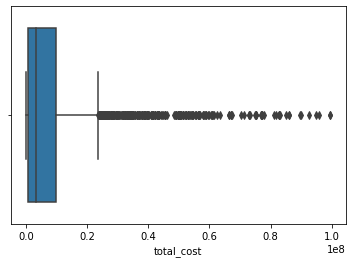

In [39]:
sns.boxplot(train.total_cost)

In [40]:
train.total_cost.describe()

count    4.809000e+03
mean     8.114389e+06
std      1.222490e+07
min      4.900000e+04
25%      8.121750e+05
50%      3.397875e+06
75%      9.945000e+06
max      9.953288e+07
Name: total_cost, dtype: float64

In [41]:
print(train.total_cost.quantile(0.10))
print(train.total_cost.quantile(0.90))

248625.0
21756766.399999987


In [42]:
train["total_cost"] = np.where(train["total_cost"]<248625.0, 248625.0, train["total_cost"])
train["total_cost"] = np.where(train["total_cost"]>21756766.399999987, 21756766.399999987, train["total_cost"])
# calculate the skewness
print(train["total_cost"].skew())

1.1042452143492199


In [43]:
# Dropping the outlier data points
index = train[(train['total_cost'] >= 9.953288e+07)|(train['total_cost'] <=  4.900000e+04)].index
train.drop(index, inplace=True)
train['total_cost'].describe()

count    4.809000e+03
mean     6.501677e+06
std      7.137644e+06
min      2.486250e+05
25%      8.121750e+05
50%      3.397875e+06
75%      9.945000e+06
max      2.175677e+07
Name: total_cost, dtype: float64

<AxesSubplot:xlabel='total_cost'>

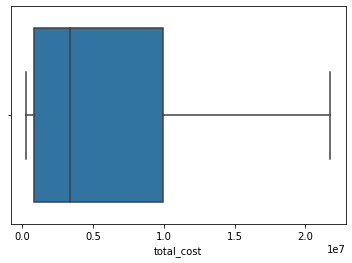

In [44]:
sns.boxplot(train.total_cost)

# EDA

In [45]:
corr = train[num_cols + ["total_cost"]].corr()
corr

,male,female,night_mainland,night_zanzibar,total_cost
male,1.000000,0.466985,-0.041957,0.050315,0.182261
female,0.466985,1.000000,0.031205,0.138541,0.298398
night_mainland,-0.041957,0.031205,1.000000,-0.118155,0.025194
night_zanzibar,0.050315,0.138541,-0.118155,1.000000,0.193337
total_cost,0.182261,0.298398,0.025194,0.193337,1.000000


<AxesSubplot:>

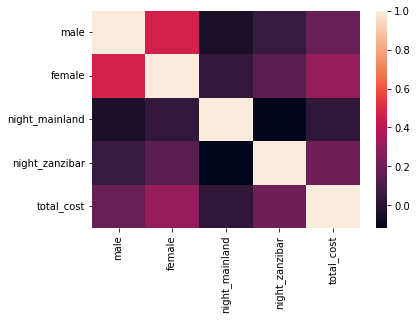

In [46]:
sns.heatmap(corr)

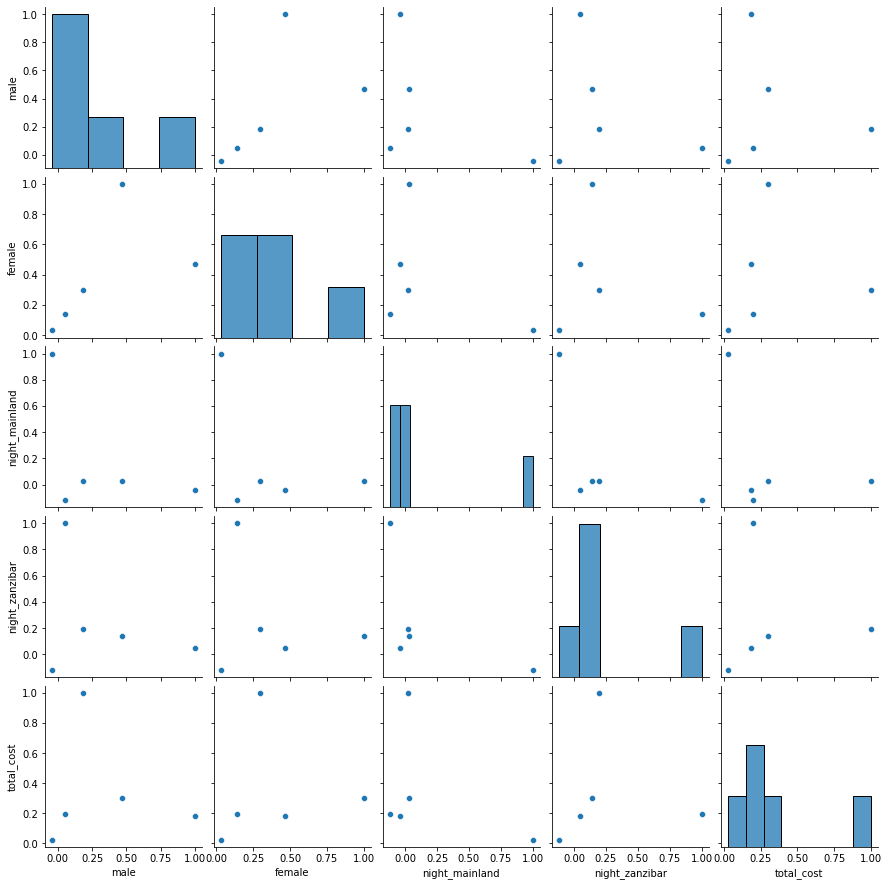

In [47]:
sns.pairplot(corr)

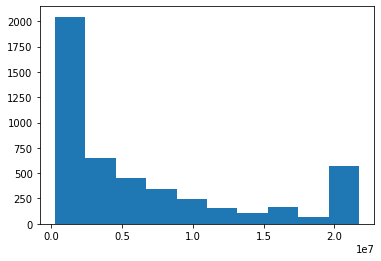

In [48]:
plt.hist(train.total_cost);

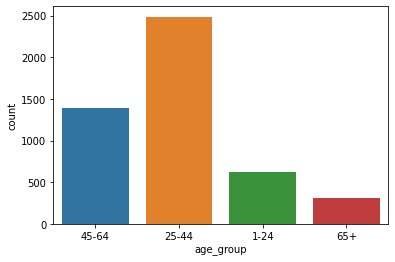

In [49]:
sns.countplot(train.age_group);

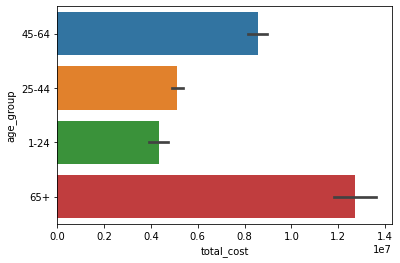

In [50]:
sns.barplot(data = train, y = "age_group", x = "total_cost");

In [51]:
import wordcloud 
from wordcloud import WordCloud, STOPWORDS

def wc(data, mask=None, title=""):
    text = " ".join(t for t in data.dropna())
    stopwords = set(STOPWORDS)
    stopwords.update([])
    wordcloud = WordCloud(stopwords=stopwords, scale=4, max_font_size=50, max_words=500,mask=mask, background_color="white").generate(text)
    fig = plt.figure(1, figsize=(16,16))
    plt.axis('off')
    fig.suptitle(title, fontsize=20)
    fig.subplots_adjust(top=2.3)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

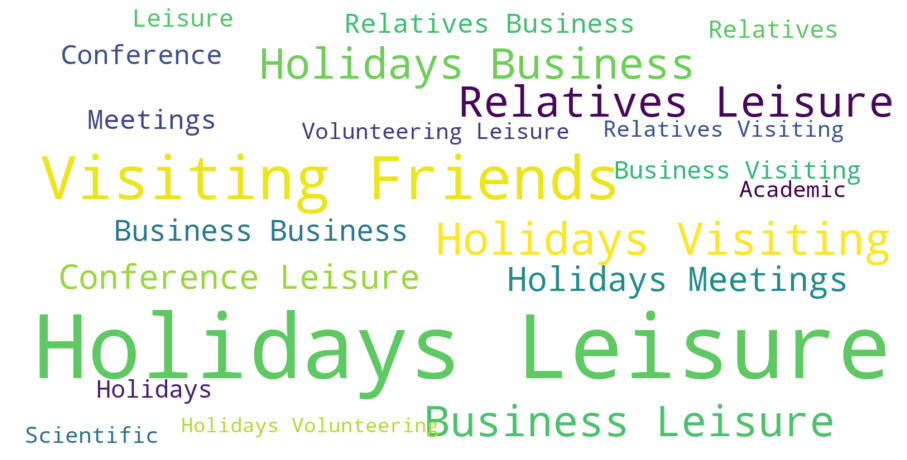

In [52]:
wc(train['purpose'], title = '', mask=None)

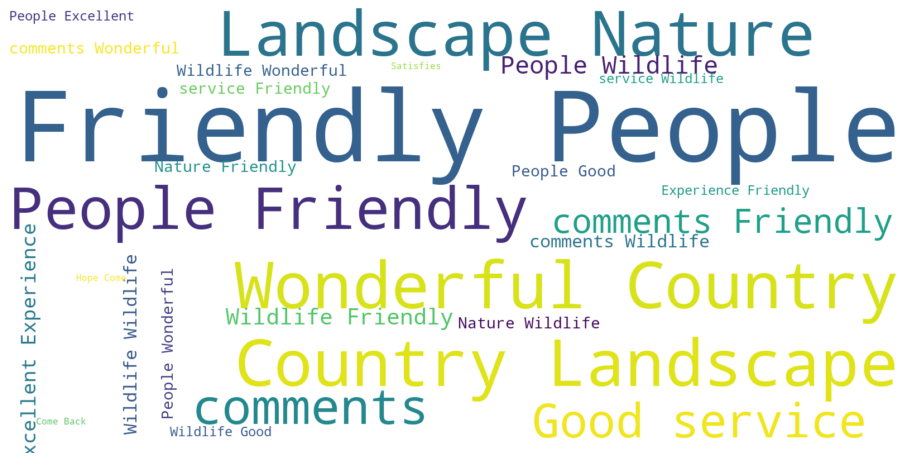

In [53]:
wc(train['feedback'], title = '', mask=None)

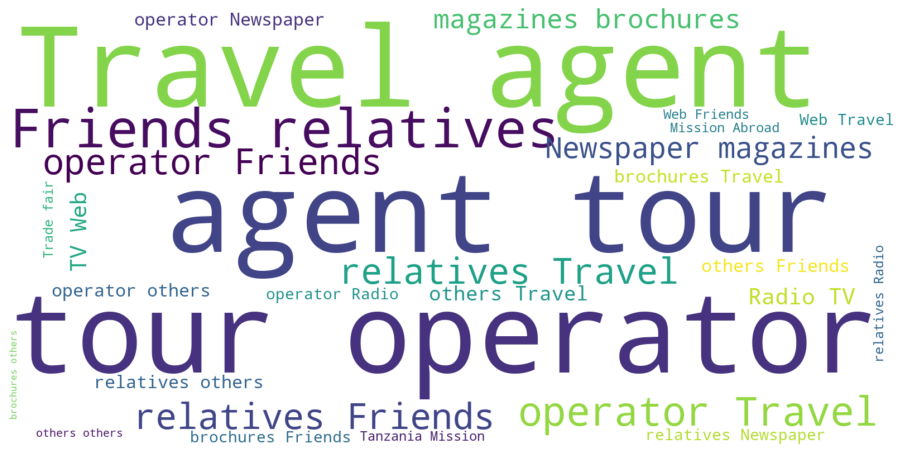

In [54]:
wc(train['info_source'], title = '', mask=None)

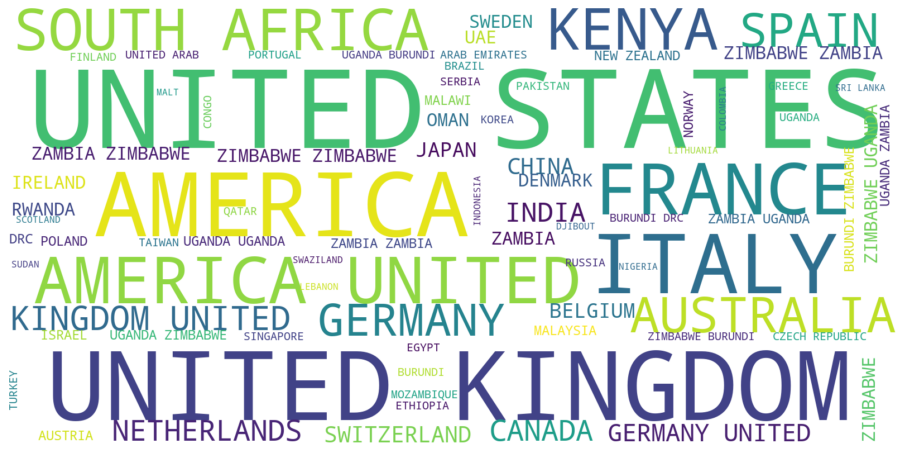

In [55]:
wc(train['country'], title = '', mask=None)

# Modelling

In [56]:
train.head()

,ID,country,ISO3,continent,age_group,travel_with,female,male,purpose,main_activity,info_source,tour_arrangement,package_transport_int,package_accomodation,package_food,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,feedback,total_cost
0,tour_0,SWITZERLAND,CHE,Europe,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,GBR,Europe,25-44,Alone,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,No,No,No,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,GBR,Europe,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,No,No,No,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,GBR,Europe,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,No,Yes,Yes,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,CHN,Asia,1-24,Alone,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,No,No,No,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [57]:
train.columns

Index(['ID', 'country', 'ISO3', 'continent', 'age_group', 'travel_with',
       'female', 'male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'feedback',
       'total_cost'],
      dtype='object')

In [58]:
feats = ['country', 'ISO3', 'continent', 'age_group', 'travel_with',
       'female', 'male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'feedback']
X = train[feats]
y = train.total_cost

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state = 0)

model = make_pipeline(
    OneHotEncoder(handle_unknown="ignore"), LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder', OneHotEncoder(handle_unknown='ignore')),
                ('linearregression', LinearRegression())])

In [60]:
y_pred = model.predict(X_test)
y_pred

array([ 7131929.97216217, 12293802.27713123,  3681251.66088194, ...,
        6485630.15275552,  1584542.91273626,   963670.53231794])

In [61]:
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

MSE: 27808087173923.2
RMSE: 5273337.384799421
R2: 0.4491452512732903


In [62]:
y_pred

array([ 7131929.97216217, 12293802.27713123,  3681251.66088194, ...,
        6485630.15275552,  1584542.91273626,   963670.53231794])

In [63]:
test.columns

Index(['ID', 'country', 'continent', 'ISO3', 'age_group', 'travel_with',
       'female', 'male', 'purpose', 'main_activity', 'info_source',
       'tour_arrangement', 'package_transport_int', 'package_accomodation',
       'package_food', 'package_transport_tz', 'package_sightseeing',
       'package_guided_tour', 'package_insurance', 'night_mainland',
       'night_zanzibar', 'payment_mode', 'first_trip_tz', 'feedback'],
      dtype='object')

In [64]:
test = test[feats]
predictions = model.predict(test)

sub_file = sample.copy()
sub_file.total_cost = predictions

In [65]:
test.columns

Index(['country', 'ISO3', 'continent', 'age_group', 'travel_with', 'female',
       'male', 'purpose', 'main_activity', 'info_source', 'tour_arrangement',
       'package_transport_int', 'package_accomodation', 'package_food',
       'package_transport_tz', 'package_sightseeing', 'package_guided_tour',
       'package_insurance', 'night_mainland', 'night_zanzibar', 'payment_mode',
       'first_trip_tz', 'feedback'],
      dtype='object')

In [68]:
sub_file

,ID,total_cost
0,tour_1,1.552539e+07
1,tour_100,1.049259e+07
2,tour_1001,9.334860e+06
3,tour_1006,3.188068e+06
4,tour_1009,1.223906e+07
...,...,...
1596,tour_988,-2.052164e+05
1597,tour_990,1.329541e+07
1598,tour_992,2.040403e+05
1599,tour_996,1.889757e+06


In [73]:
from sklearn.model_selection import cross_validate
cv_results = cross_validate(model, X, y)
cv_results

{'fit_time': array([0.16643977, 0.16600442, 0.14352989, 0.16695476, 0.14747739]),
 'score_time': array([0.01419783, 0.01269531, 0.01230407, 0.01277447, 0.01319242]),
 'test_score': array([0.46752451, 0.43608455, 0.48245607, 0.48029946, 0.53429667])}

In [74]:
scores = cv_results["test_score"]
print(f"The accuracy is: {scores.mean():.3f} +/- {scores.std():.3f}")

The accuracy is: 0.480 +/- 0.032


In [72]:
# sub_file.to_csv("TZ2.csv", index = False)